In [33]:
import pandas as pd
import os
from tqdm import tqdm
from random import randint
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [34]:
# Función del grafico de la cantidad de etiquetas del dataset
def grafico(diccionario:dict) -> None:
    datos_ordenados = sorted(diccionario.items(), key=lambda item: item[1], reverse=True)
    etiquetas, alturas = zip(*datos_ordenados)
    plt.bar(etiquetas, alturas, color='skyblue')
    plt.xlabel('Etiquetas')
    plt.ylabel('Cantidad')
    plt.title('Gráfico de Barras')
    plt.xticks(rotation=90)
    plt.show()

In [35]:
# Con el dataframe se crea un diccionario se itera en las etiquetas, se agrega la cantidad y porcentaje 
# de cada etiqueta en el diccionario y al final se muestran los valores
def ver_categorias(data:pd.DataFrame) -> None:
  diccionario = {}
  for categoria in data['label'].unique():
    cantidad = data["label"][data["label"]==categoria].count()
    porcentaje = round(cantidad/len(data)*100,2)
    diccionario[categoria] = cantidad
    print(f'\n\nCategoría: {categoria}     Cantidad: {cantidad}    Porcentaje: {porcentaje}%')
  print('\n')
  print(diccionario)
  print('\n\n')
  grafico(diccionario)
  print('\n\n\n\n')

In [36]:
# porcentaje de cada categoria para mostrar en el grafico
def porcentaje_categorias(data:pd.DataFrame) -> dict:
  porcentaje_categorias = {}
  for categoria in data['label'].unique():
    cantidad = data["label"][data["label"]==categoria].count()
    porcentaje = round(cantidad/len(data)*100,2)
    porcentaje_categorias[categoria] = porcentaje
  return porcentaje_categorias

In [37]:
df_prueba = pd.read_csv('datasets/dataset_originales/part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')



Categoría: DDoS-PSHACK_Flood     Cantidad: 22155    Porcentaje: 8.81%


Categoría: DoS-UDP_Flood     Cantidad: 17851    Porcentaje: 7.1%


Categoría: DoS-TCP_Flood     Cantidad: 14375    Porcentaje: 5.72%


Categoría: Mirai-udpplain     Cantidad: 4846    Porcentaje: 1.93%


Categoría: DDoS-UDP_Flood     Cantidad: 29075    Porcentaje: 11.57%


Categoría: DDoS-ICMP_Flood     Cantidad: 39236    Porcentaje: 15.61%


Categoría: DDoS-RSTFINFlood     Cantidad: 21781    Porcentaje: 8.66%


Categoría: DDoS-TCP_Flood     Cantidad: 24266    Porcentaje: 9.65%


Categoría: DDoS-SynonymousIP_Flood     Cantidad: 19101    Porcentaje: 7.6%


Categoría: Mirai-greip_flood     Cantidad: 3987    Porcentaje: 1.59%


Categoría: DoS-SYN_Flood     Cantidad: 10780    Porcentaje: 4.29%


Categoría: DDoS-SYN_Flood     Cantidad: 21650    Porcentaje: 8.61%


Categoría: Mirai-greeth_flood     Cantidad: 5343    Porcentaje: 2.13%


Categoría: BenignTraffic     Cantidad: 5992    Porcentaje: 2.38%


Categoría: MITM-Ar

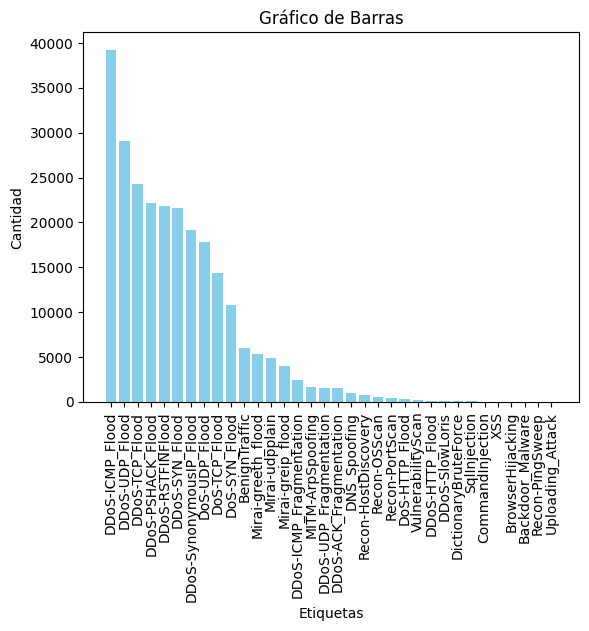

In [38]:
ver_categorias(df_prueba)

In [50]:
df_prueba['label'][df_prueba['label']!='BenignTraffic'] = 'malware'



Categoría: malware     Cantidad: 245400    Porcentaje: 97.62%


Categoría: BenignTraffic     Cantidad: 5992    Porcentaje: 2.38%


{'malware': 245400, 'BenignTraffic': 5992}





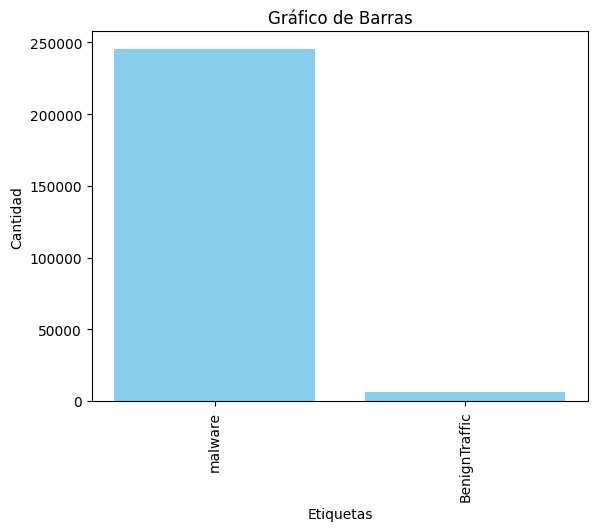

In [51]:
ver_categorias(df_prueba)

In [39]:
# se crea una lista con todos los datasets para concatenarlos en uno solo
DATASET_DIRECTORY = 'datasets/dataset_originales/'
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
len(df_sets)

50

In [40]:
# De cada dataset se calcula la etiqueta que tiene menos porcentaje de valores
def cantidad_minima(data:pd.DataFrame) -> int:
  lista = []
  for etiqueta in data['label'].unique():
    lista.append(data['label'][data['label']==etiqueta].count())
  return min(lista)


In [41]:
df = pd.DataFrame()

In [42]:
# Función para concatenar todos los datasets
def dataset_binario(archivo:str, data:pd.DataFrame) -> pd.DataFrame:
  df_original = pd.read_csv(DATASET_DIRECTORY + archivo)# se carga un dataset
  etiquetas = list(df_original['label'].unique())
  etiquetas.remove('BenignTraffic')
  cantidad = cantidad_minima(df_original)
  cantidad_benigno = len(df_original[df_original['label']=='BenignTraffic'])//900 # se llego a 900 despues de hacer pruebas para ver como quedaban balanceados los datos
  for etiqueta in etiquetas:
    data = pd.concat([data, df_original[df_original['label']== etiqueta].sample(cantidad)])
    data = pd.concat([data, df_original[df_original['label']=='BenignTraffic'].sample(cantidad_benigno)])
  return data

In [43]:
# se iteran toda la lista de archivos para concatenar todos los archivos
for archivo in tqdm(df_sets):
  df = dataset_binario(archivo, df)
df.shape

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [03:47<00:00,  4.54s/it]


(29964, 47)



Categoría: Mirai-greeth_flood     Cantidad: 470    Porcentaje: 1.57%


Categoría: BenignTraffic     Cantidad: 14454    Porcentaje: 48.24%


Categoría: DDoS-ICMP_Flood     Cantidad: 470    Porcentaje: 1.57%


Categoría: DDoS-UDP_Flood     Cantidad: 470    Porcentaje: 1.57%


Categoría: DoS-SYN_Flood     Cantidad: 470    Porcentaje: 1.57%


Categoría: DoS-UDP_Flood     Cantidad: 470    Porcentaje: 1.57%


Categoría: DDoS-RSTFINFlood     Cantidad: 470    Porcentaje: 1.57%


Categoría: DDoS-TCP_Flood     Cantidad: 470    Porcentaje: 1.57%


Categoría: Recon-OSScan     Cantidad: 470    Porcentaje: 1.57%


Categoría: DDoS-SYN_Flood     Cantidad: 470    Porcentaje: 1.57%


Categoría: Mirai-greip_flood     Cantidad: 470    Porcentaje: 1.57%


Categoría: DDoS-PSHACK_Flood     Cantidad: 470    Porcentaje: 1.57%


Categoría: DDoS-SynonymousIP_Flood     Cantidad: 470    Porcentaje: 1.57%


Categoría: Mirai-udpplain     Cantidad: 470    Porcentaje: 1.57%


Categoría: DoS-TCP_Flood     Cantidad: 4

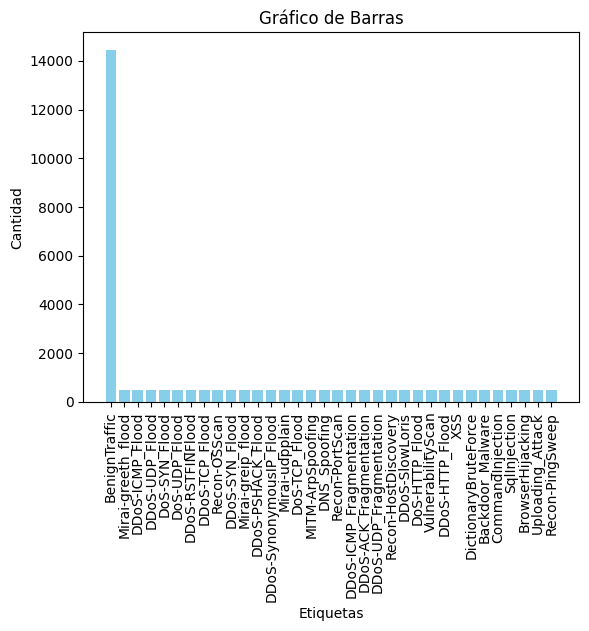

In [44]:
ver_categorias(df)

In [45]:
# Se asigna el valor de 'malware' a las categorias que no son benigno
df['label'][df['label']!='BenignTraffic'] = 'malware'

In [46]:
df['label'].unique()

array(['malware', 'BenignTraffic'], dtype=object)

In [47]:
df.sample(10)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
335828,0.276926,408495.00,6.00,64.00,1197.068559,1197.068559,0.0,0.0,0.0,0.0,...,22.364789,66.00,1.666125e+08,13.5,12.003181,31.696707,5.060373e+02,1.00,244.60,malware
221025,13.211046,645636.10,6.00,214.80,165.553171,165.553171,0.0,0.0,0.0,0.0,...,22.364789,66.00,1.665209e+08,13.5,12.003181,31.696707,5.060373e+02,1.00,244.60,BenignTraffic
166985,74.362811,3897021.00,6.00,82.70,49.801024,49.801024,0.0,0.0,0.0,0.0,...,3306.040538,1957.80,1.665236e+08,13.5,78.254545,4685.170118,1.099918e+07,1.00,244.60,BenignTraffic
351761,48.822777,27110.80,7.60,187.60,19.806438,19.806438,0.0,0.0,0.0,0.0,...,98.874413,144.50,1.665201e+08,13.5,15.523571,139.977403,1.048495e+04,1.00,244.60,BenignTraffic
276822,89.846035,77263.60,7.10,97.70,4.732862,4.732862,0.0,0.0,0.0,0.0,...,30.517018,103.60,1.733351e-02,5.5,12.991919,43.157581,1.407016e+03,0.70,38.50,BenignTraffic
253627,0.052096,6.60,46.40,65.75,1.942960,1.942960,0.0,0.0,0.0,0.0,...,14.444050,569.24,8.364656e+07,9.5,33.837047,20.470909,2.126730e+03,0.10,141.55,malware
79727,1.408215,326645.50,17.00,64.00,167.713450,167.713450,0.0,0.0,0.0,0.0,...,544.138853,938.00,8.337045e+07,9.5,43.472402,769.472095,3.116788e+05,0.95,141.55,malware
31155,23.225032,598258.60,6.00,181.20,113.035160,113.035160,0.0,0.0,0.0,0.0,...,991.324641,219.80,1.665237e+08,13.5,53.917628,1402.010847,9.953549e+05,1.00,244.60,BenignTraffic
10557,0.066610,17725.00,17.00,64.00,5207.512210,5207.512210,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.312387e+07,9.5,10.000000,0.000000,0.000000e+00,0.00,141.55,malware
80278,1.810910,2897.19,6.77,65.81,284.606697,284.606697,0.0,0.0,0.0,0.0,...,36.620088,94.29,8.337539e+07,9.5,12.875967,51.747910,1.930627e+03,0.90,141.55,malware




Categoría: malware     Cantidad: 15510    Porcentaje: 51.76%


Categoría: BenignTraffic     Cantidad: 14454    Porcentaje: 48.24%


{'malware': 15510, 'BenignTraffic': 14454}





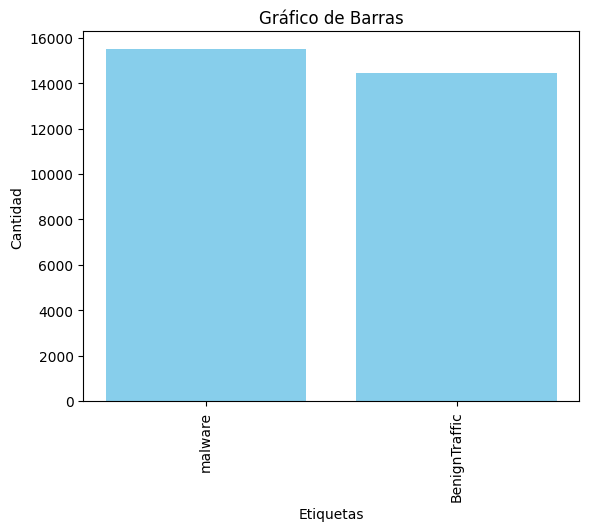

In [48]:
# se visualiza el porcentaje de cada categoria de la etiqueta objetivo
ver_categorias(df)

In [49]:
df.to_parquet('datasets/datasets_entrenamieto/Dataset_binario.parquet', index=False)